# **Assignment 2**
### **Abstract**
This study examines relative error of the Taylor Approximation due to the actual values of the function $e^{-x}$  where:
$$e^{-x} = ∑ \limits_{n=0}^{∞} \frac {(-1)^n}{n!} x^n$$
The purpose is to study the behaviour of the error function with respect to  order of the approximation. It was found that as the value of variable increases, it requires a higher order of approximation to reduce error.
### **Introduction**
When a mathematical operation is approximated, relative error occurs. Because of systems' memory, speed, and/or incapacity to complete an infinite number of operations in a finite amount of time, those approximations can be be estimated using python. In this assignment we are asked to analyze errors with respect to the value of order and see how the error function behaves.


### **Methods**
First, I import all the neccessary packages and defined a Maclaurin expansion of the function $e^{-x}$. I created a function $e(x, N)$, so I could use it later in code. Also, I created a function *error* and *plot*, because I tried to make my code more flexible.

In [ ]:
#importing packages
import numpy as np
import scipy.special as scs
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [ ]:
#defining function e^-x
def e(x,N):
  if N<0: #It is not possible to take negative value as factorial
    print("Wrong input of the order of series. Please try again.")
    N = int(input('Enter the order of Maclaurin series: '))
  elif int(N)!=N: #checking if the inputed number is an integer value
    print("Wrong format of the number. Please enter the int value.")
    N = int(input('Enter the order of Maclaurin series: '))
  return np.sum([((((-x)**i))/math.factorial(i)) for i in range(N+1)])

In [ ]:
#Computing error using the expected value (true value) of exp and computed in the code
#delta variable represents a relative error
def error(x, t):
  V_e = np.exp(-x)
  V_a = e(x,t)
  delta = abs((V_a-V_e)/V_e)
  return delta

In [ ]:
#defining a function to create a plot
def plot(val, N):
  x = np.arange(1, N+1, 1)
  y = np.zeros(N)
  V_e = np.exp(-val)
  V_a = np.zeros(N)
  for n in range(1,N+1):
    V_a[n-1] = e(val,n)
    y[n-1] = error(val, n)
    if y[n-1]<10**(-14) and y[n-1]>=10**(-15):#to find the values where the relative error is 10^-15 order
          print("For x =", val, ", at the value of order n =", n, ", the relative error attain the value of ", error(val, n))
    if y[n-1]==0: #since the python cannot go further 10^-17 it sometimes give 0 as the value
      y[n-1]=y[n-2]
  plt.plot(x,y)
  plt.yscale("log")
  plt.xlabel("Value of order")
  plt.ylabel("Relative error")

Now, I test my code using random input values:

In [ ]:
#inputing values of variables
t = int(input('Enter the order of Maclaurin series: '))
x = float(input('Enter the va2lue of x: '))
print("The value of Taylor approximation is", e(x,t))
print('Expected value of exp(-x)', np.exp(-x))
print('Relative error is ', error(x, t))

Enter the order of Maclaurin series: 25
Enter the va2lue of x: 2
The value of Taylor approximation is 0.13533528323661273
Expected value of exp(-x) 0.1353352832366127
Relative error is  2.0508750528199364e-16


And according to the part **e** of the assignment, I used my function *plot* for various values of the variable x. Variable N represents the order of approximation.

For x = 0.3 , at the value of order n = 11 , the relative error attain the value of  1.6485087609803311e-15
For x = 1 , at the value of order n = 16 , the relative error attain the value of  7.544747683438505e-15
For x = 2.0 , at the value of order n = 22 , the relative error attain the value of  1.2305250316919619e-15


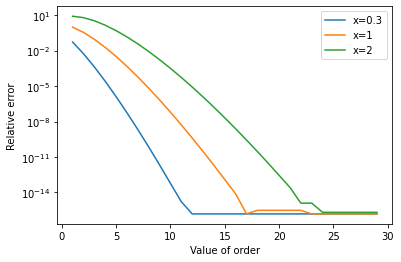

In [ ]:
#assigning values of x and plotting errors on one graph
N=29
plot(0.3, N)
plot(1, N)
plot(2.0, N)
plt.legend(['x=0.3', 'x=1', 'x=2'])

### **Results**
As it can be seen, the graph of the error between approximation and the actual value of $e^{-0.3}$ is more sharp and the error decreases faster, comparing to the other graphs. Moreover, it can be noticed that as the values of $x$ increases, the order required to reduce error also increses. That is, for $x=0.3$, the order is 11, for $x=1$, the order is 16, and for $x=2$, the order is 22. However, it is supprising to observe that at some point the error start to steadly increase. Which means that there is a specific point at which it is possible to achieve the minimum possible error.

### **Conclusion**
In this assignment the main goal was to observe the behaviour of the error function as the x and order of approximation increases. As it was found both the order and values of x play a significant role in the behaviour of the error function.